In [3]:
import os
import cv2
import numpy as np

In [2]:
!unzip Faces.zip -d Faces

Archive:  Faces.zip
   creating: Faces/Faces/
  inflating: Faces/__MACOSX/._Faces  
   creating: Faces/Faces/train/
  inflating: Faces/__MACOSX/Faces/._train  
   creating: Faces/Faces/val/
  inflating: Faces/__MACOSX/Faces/._val  
   creating: Faces/Faces/train/Ben Afflek/
  inflating: Faces/__MACOSX/Faces/train/._Ben Afflek  
   creating: Faces/Faces/train/Elton John/
  inflating: Faces/__MACOSX/Faces/train/._Elton John  
   creating: Faces/Faces/train/Jerry Seinfield/
  inflating: Faces/__MACOSX/Faces/train/._Jerry Seinfield  
   creating: Faces/Faces/train/Mindy Kaling/
  inflating: Faces/__MACOSX/Faces/train/._Mindy Kaling  
   creating: Faces/Faces/train/Madonna/
  inflating: Faces/__MACOSX/Faces/train/._Madonna  
   creating: Faces/Faces/val/ben_afflek/
  inflating: Faces/__MACOSX/Faces/val/._ben_afflek  
   creating: Faces/Faces/val/madonna/
  inflating: Faces/__MACOSX/Faces/val/._madonna  
   creating: Faces/Faces/val/elton_john/
  inflating: Faces/__MACOSX/Faces/val/._elton_j

In [6]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
DIR = r'/content/Faces/Faces/train'

In [12]:
haar_cascade = cv2.CascadeClassifier('haar_face.xml')

features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)

            if img_array is None:
                continue

            gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x,y,w,h) in faces_rect:
                face_roi = gray[y:y+h, x:x+h]
                features.append(face_roi)
                labels.append(label)

In [13]:
create_train()
print('Training done')

features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

Training done


In [14]:
import matplotlib.pyplot as plt

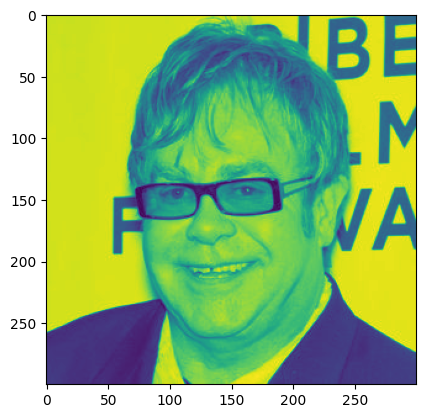

In [18]:
# 2. Recognition
haar_cascade = cv2.CascadeClassifier('haar_face.xml')

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
# features = np.load('features.npy', allow_pickle=True)
# labels = np.load('labels.npy')

face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

img = cv2.imread(r'/content/Faces/Faces/val/elton_john/1.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

Label = Elton John with a confidence of 67.00856809674691


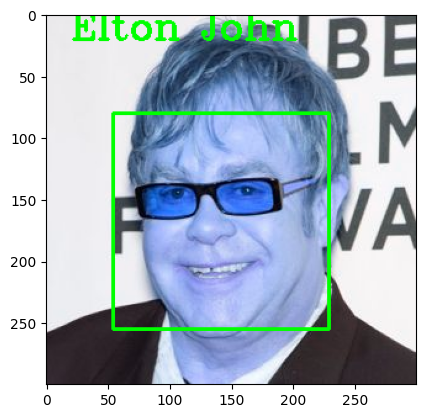

In [19]:
# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv2.putText(img, str(people[label]), (20,20), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

plt.imshow(img)